## Load Dataset


In [ ]:
import pandas as pd

# Load the dataset from the Hugging Face URL
df = pd.read_csv('https://huggingface.co/datasets/Jakehills/Crop_Yield_Fertilizer/raw/main/Crop_Yield_Fertilizer.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info (data types and non-null values):")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

First 5 rows of the DataFrame:
      N     P     K  temperature   humidity        ph    rainfall label  \
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice   
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice   
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice   
3  74.0  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice   
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice   

       yield fertilizer  
0  71.199428        DAP  
1  81.620199        DAP  
2  80.473130     Gypsum  
3  75.178196        DAP  
4  75.485563     Gypsum  

DataFrame Info (data types and non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            25000 non-null  float64
 1   P            25000 non-null  float64
 2   K            25000 non-null  f

## Data Cleaning and Preprocessing




In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
yield          0
fertilizer     0
dtype: int64



No missing values,checking for any inconsistencies or variations.



In [ ]:
print("Unique values in 'label' column:")
print(df['label'].unique())

print("\nUnique values in 'fertilizer' column:")
print(df['fertilizer'].unique())

Unique values in 'label' column:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Unique values in 'fertilizer' column:
['DAP' 'Gypsum' 'Lime' 'MOP' 'Urea' 'Rhizobium' 'SSP' 'Potassium Nitrate'
 'Rock Phosphate']


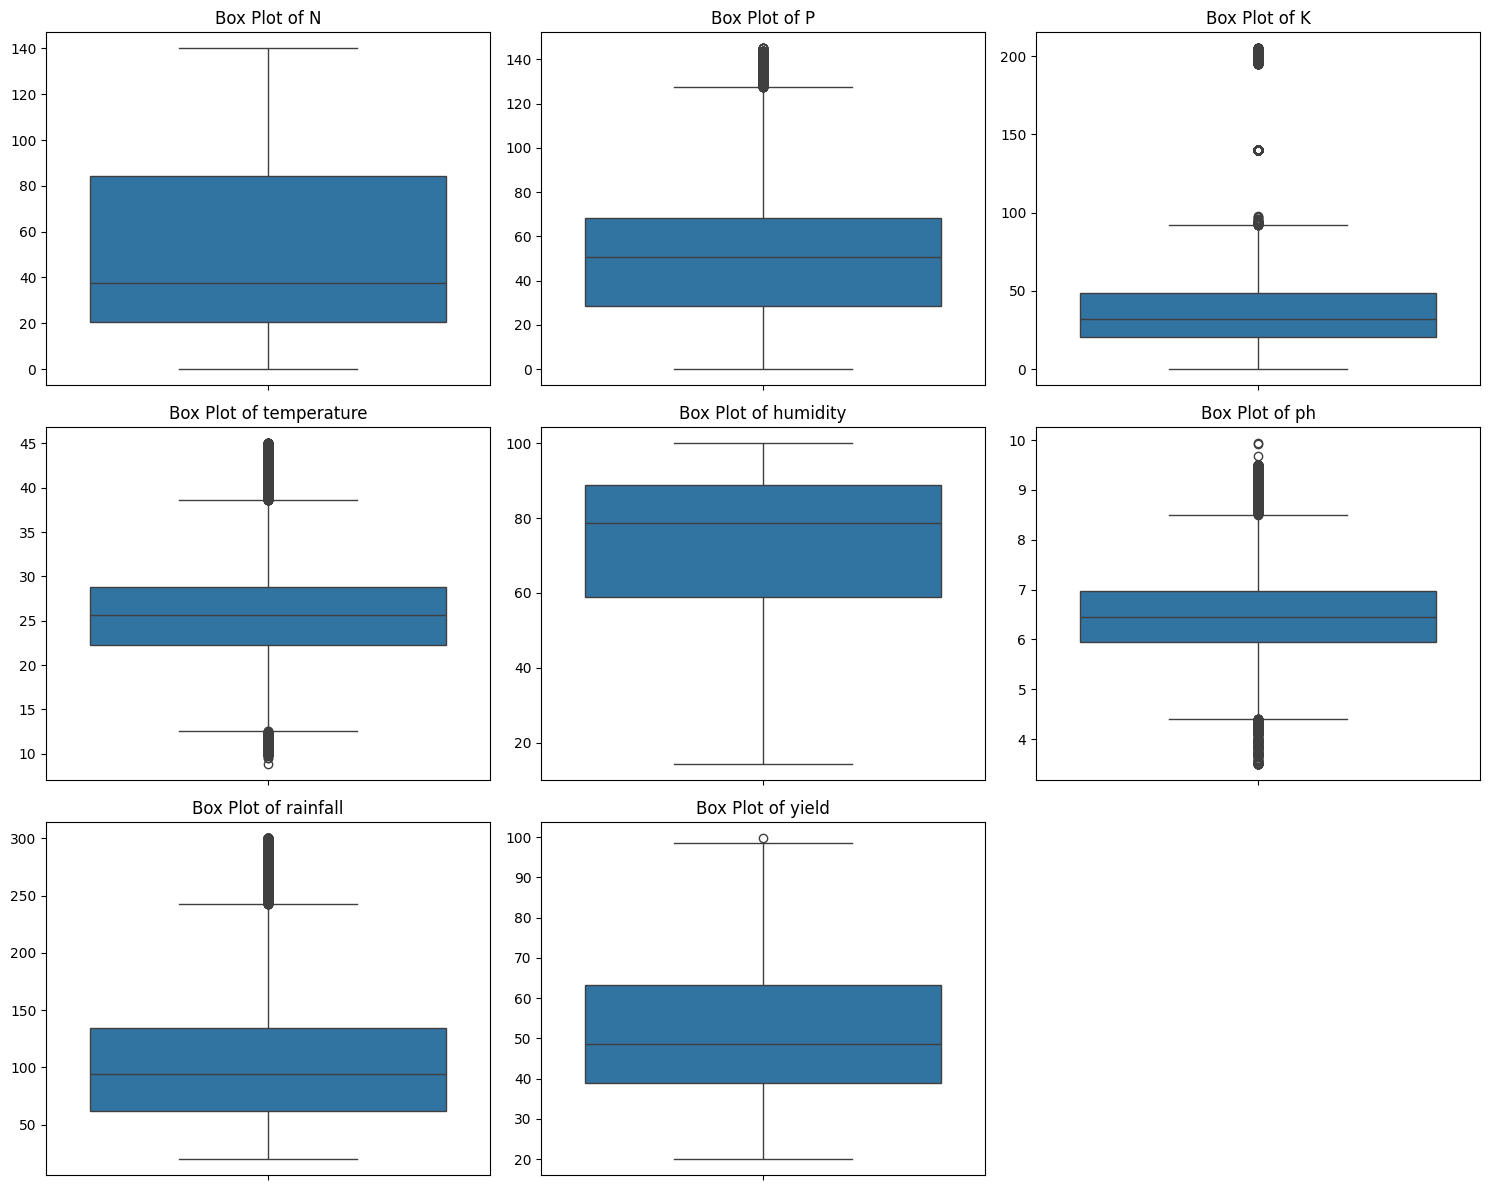

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'yield']

# Create box plots for each numerical column
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Arrange plots in a 3x3 grid
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-axis label as title is sufficient
plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA) and Visualization




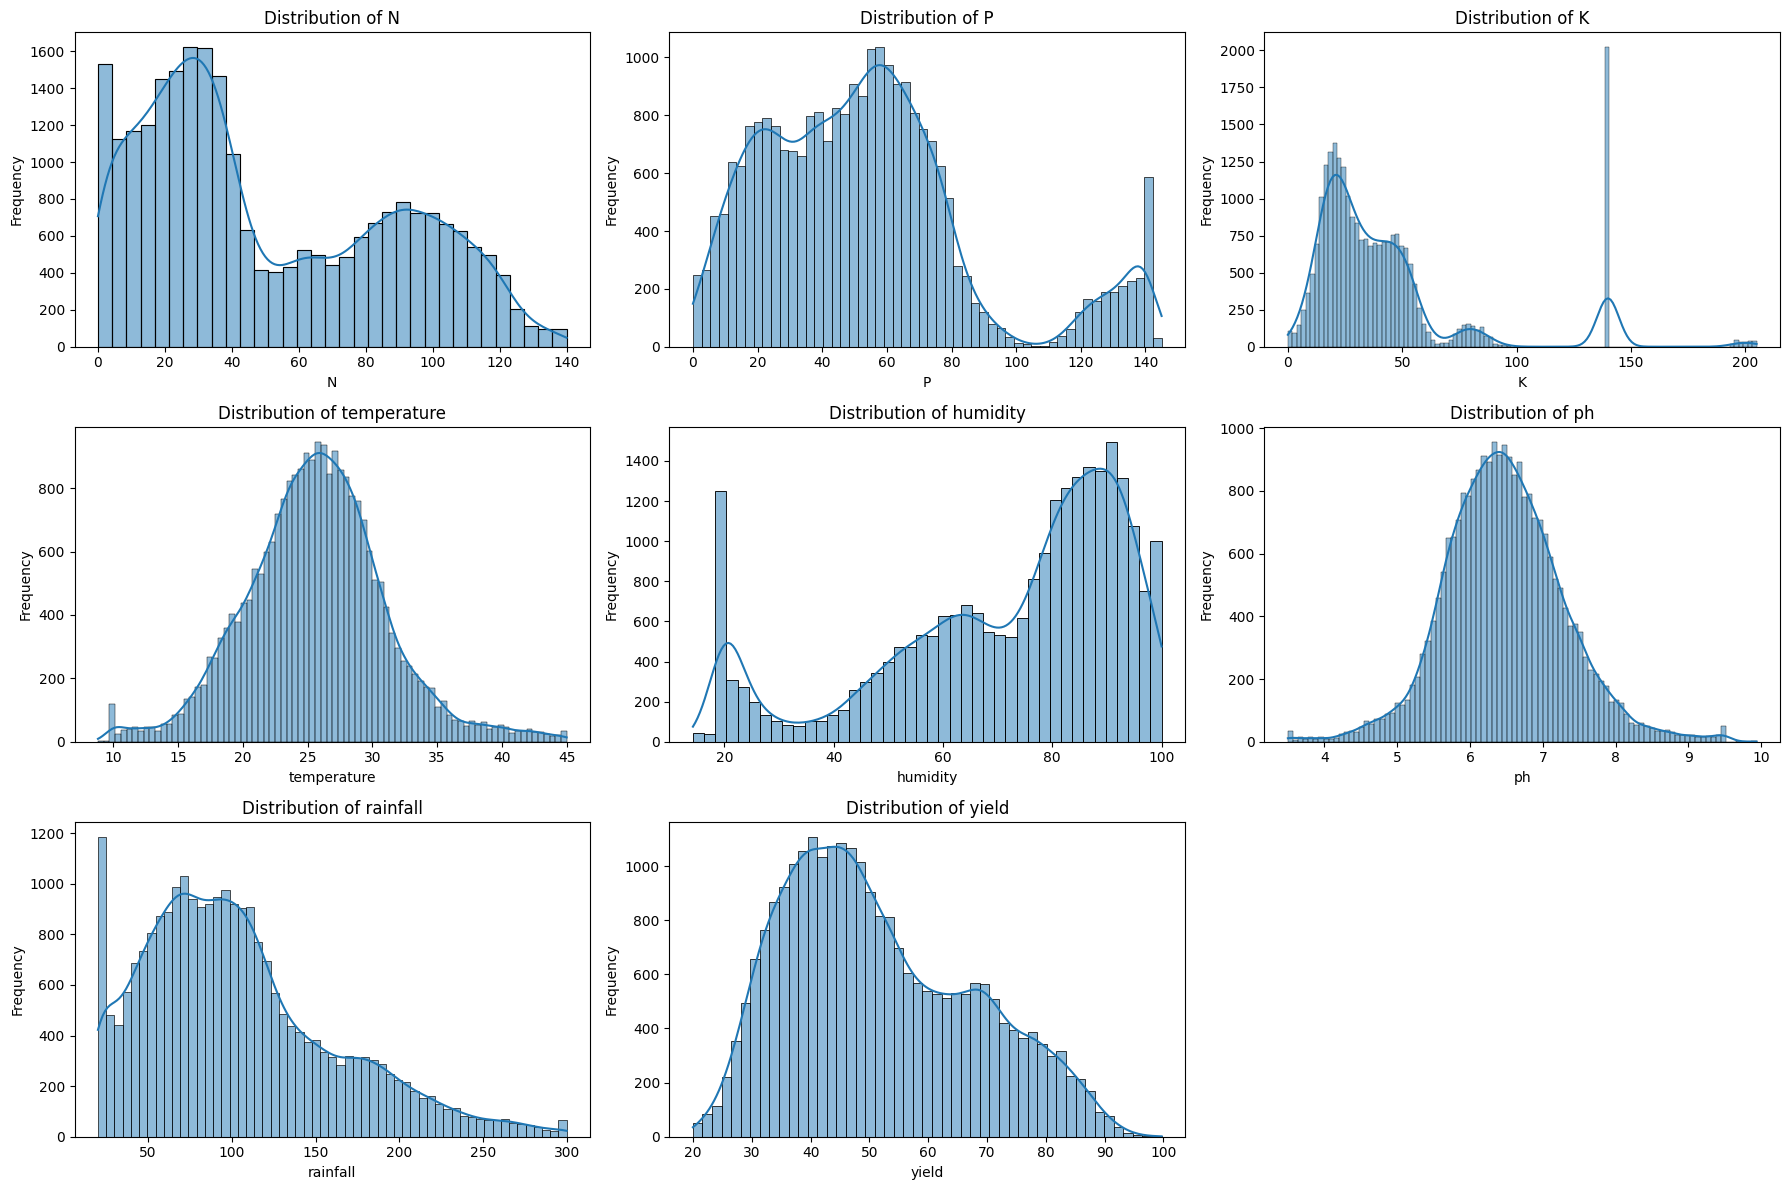

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot histograms for
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'yield']

# Create histograms for each numerical column
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Arrange plots in a 3x3 grid
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

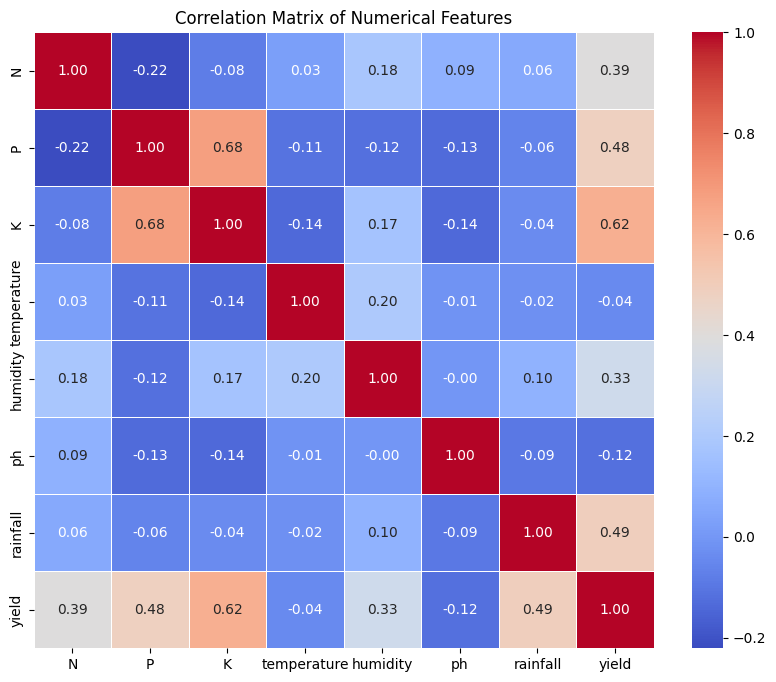

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

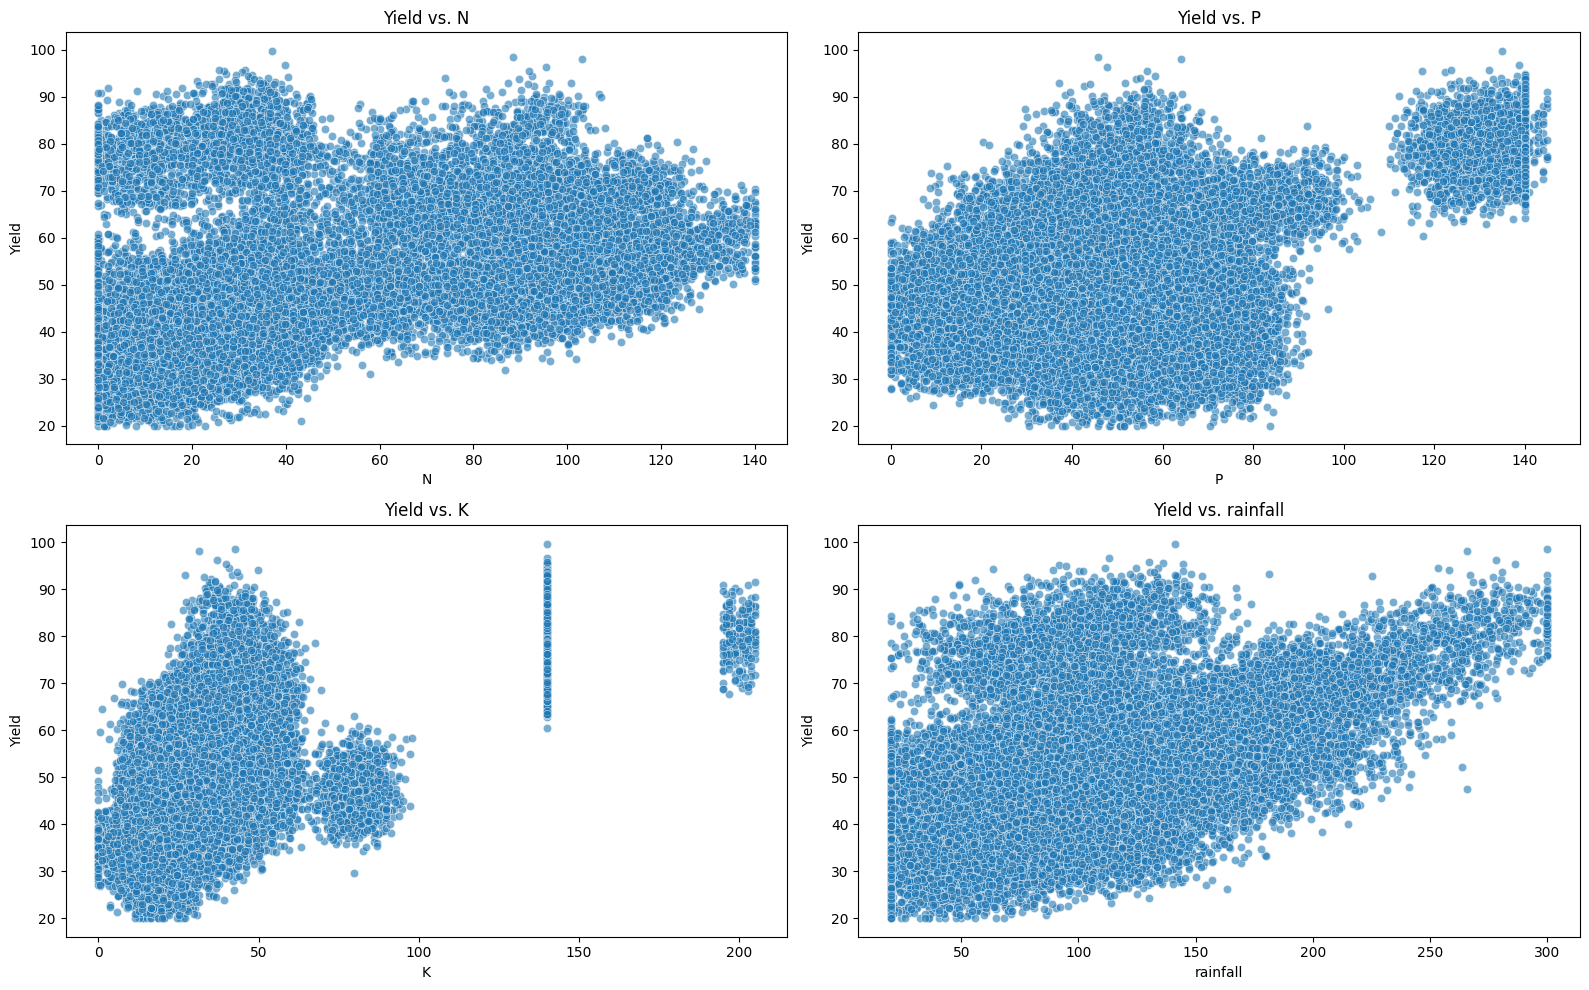

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of key numerical features for scatter plots against 'yield'
key_numerical_features = ['N', 'P', 'K', 'rainfall']

# Create scatter plots for yield against key numerical features
plt.figure(figsize=(16, 10))
for i, col in enumerate(key_numerical_features):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.scatterplot(x=df[col], y=df['yield'], alpha=0.6)
    plt.title(f'Yield vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Yield')
plt.tight_layout()
plt.show()

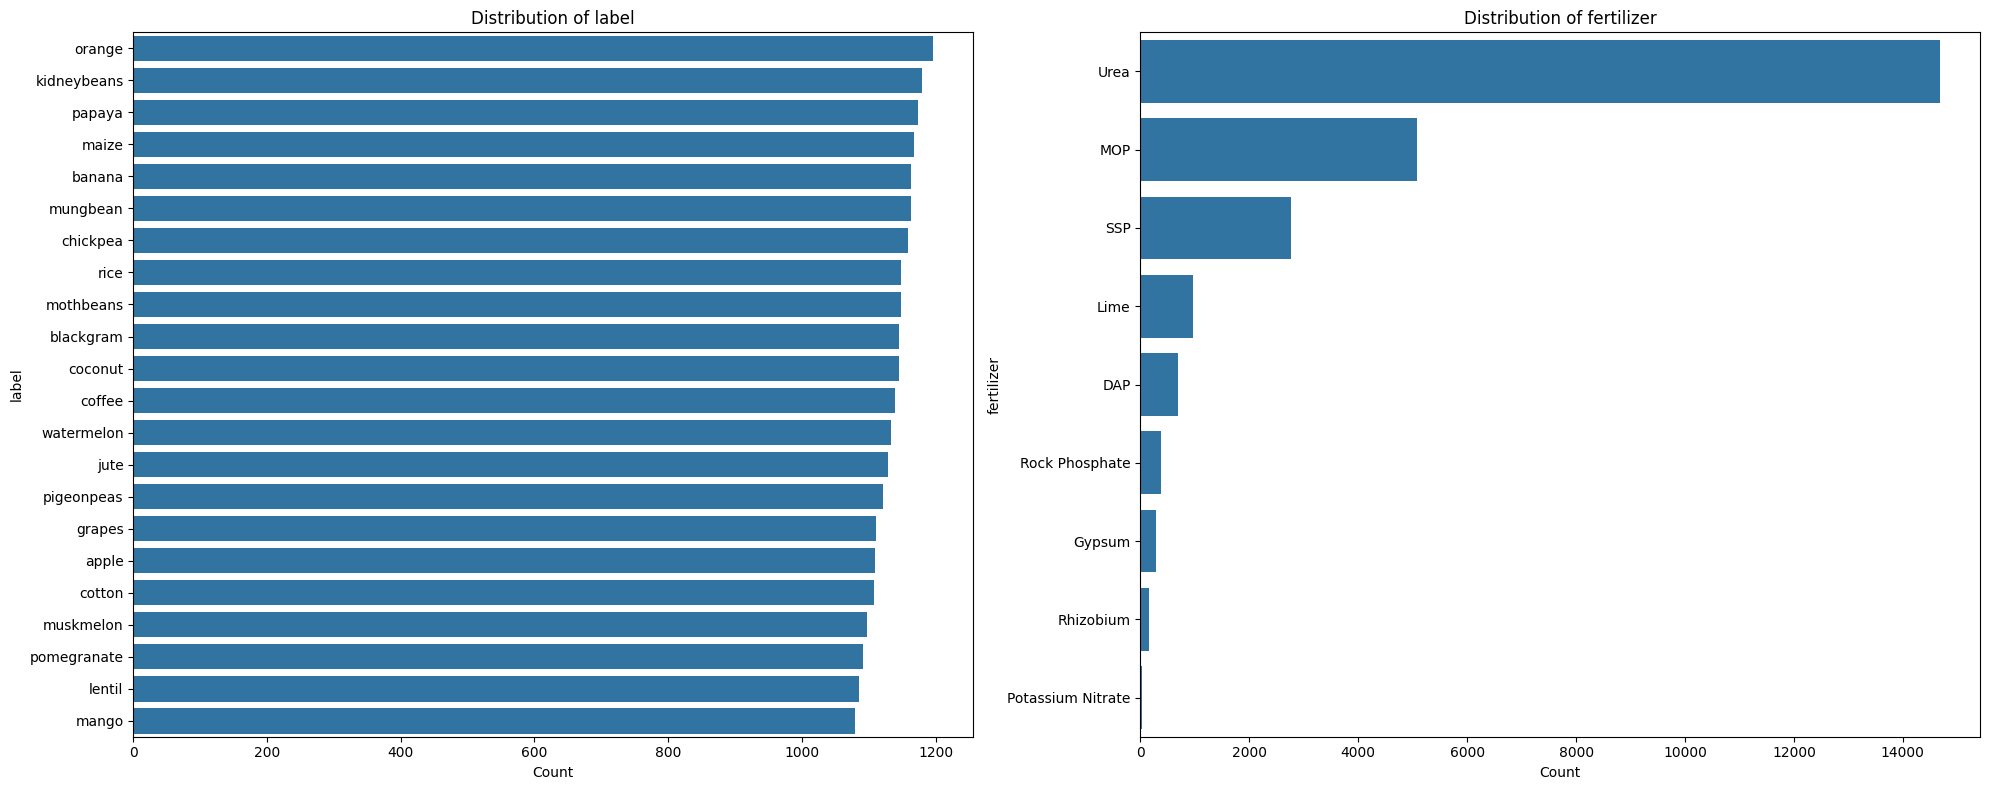

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to plot
categorical_cols = ['label', 'fertilizer']

# Create count plots for each categorical column
plt.figure(figsize=(20, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1) # Arrange plots side-by-side
    sns.countplot(y=df[col], order = df[col].value_counts().index) # Plot horizontal bars for better readability if many categories
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Feature Engineering and Encoding


In [ ]:
import pandas as pd

# 1. Apply one-hot encoding to categorical columns 'label' and 'fertilizer'
df_encoded = pd.get_dummies(df, columns=['label', 'fertilizer'], drop_first=True)

# 2. Create interaction features
df_encoded['N_temp'] = df_encoded['N'] * df_encoded['temperature']
df_encoded['P_humidity'] = df_encoded['P'] * df_encoded['humidity']
df_encoded['K_rainfall'] = df_encoded['K'] * df_encoded['rainfall']

print("First 5 rows of the DataFrame with new features and encoded columns:")
print(df_encoded.head())

print("\nShape of the DataFrame after feature engineering:")
print(df_encoded.shape)

First 5 rows of the DataFrame with new features and encoded columns:
      N     P     K  temperature   humidity        ph    rainfall      yield  \
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536  71.199428   
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537  81.620199   
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248  80.473130   
3  74.0  35.0  40.0    26.491096  80.158363  6.980401  242.864034  75.178196   
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340  75.485563   

   label_banana  label_blackgram  ...  fertilizer_Lime  fertilizer_MOP  \
0         False            False  ...            False           False   
1         False            False  ...            False           False   
2         False            False  ...            False           False   
3         False            False  ...            False           False   
4         False            False  ...            False           False   

   fe

## Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define features (X) and target variable (y)
X = df_encoded.drop('yield', axis=1)
y = df_encoded['yield']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (20000, 39)
Shape of X_test: (5000, 39)
Shape of y_train: (20000,)
Shape of y_test: (5000,)


## Model Training



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# 1. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Regressor training complete.")

# 2. XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Regressor training complete.")

# 3. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression training complete.")

Random Forest Regressor training complete.
XGBoost Regressor training complete.
Linear Regression training complete.


## Model Evaluation



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store model predictions and evaluations
model_evaluations = {}

# Evaluate Random Forest Regressor
print("\n--- Random Forest Regressor Evaluation ---")
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)
model_evaluations['Random Forest'] = {'MAE': rf_mae, 'RMSE': rf_rmse, 'R2': rf_r2}
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"R-squared: {rf_r2:.4f}")

# Evaluate XGBoost Regressor
print("\n--- XGBoost Regressor Evaluation ---")
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)
model_evaluations['XGBoost'] = {'MAE': xgb_mae, 'RMSE': xgb_rmse, 'R2': xgb_r2}
print(f"MAE: {xgb_mae:.4f}")
print(f"MSE: {xgb_mse:.4f}")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"R-squared: {xgb_r2:.4f}")

# Evaluate Linear Regression
print("\n--- Linear Regression Evaluation ---")
lr_predictions = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)
model_evaluations['Linear Regression'] = {'MAE': lr_mae, 'RMSE': lr_rmse, 'R2': lr_r2}
print(f"MAE: {lr_mae:.4f}")
print(f"MSE: {lr_mse:.4f}")
print(f"RMSE: {lr_rmse:.4f}")
print(f"R-squared: {lr_r2:.4f}")


--- Random Forest Regressor Evaluation ---
MAE: 3.6782
MSE: 21.1527
RMSE: 4.5992
R-squared: 0.9164

--- XGBoost Regressor Evaluation ---
MAE: 3.7594
MSE: 22.2158
RMSE: 4.7134
R-squared: 0.9122

--- Linear Regression Evaluation ---
MAE: 3.8767
MSE: 23.2337
RMSE: 4.8201
R-squared: 0.9082


/tmp/ipython-input-3508702311.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


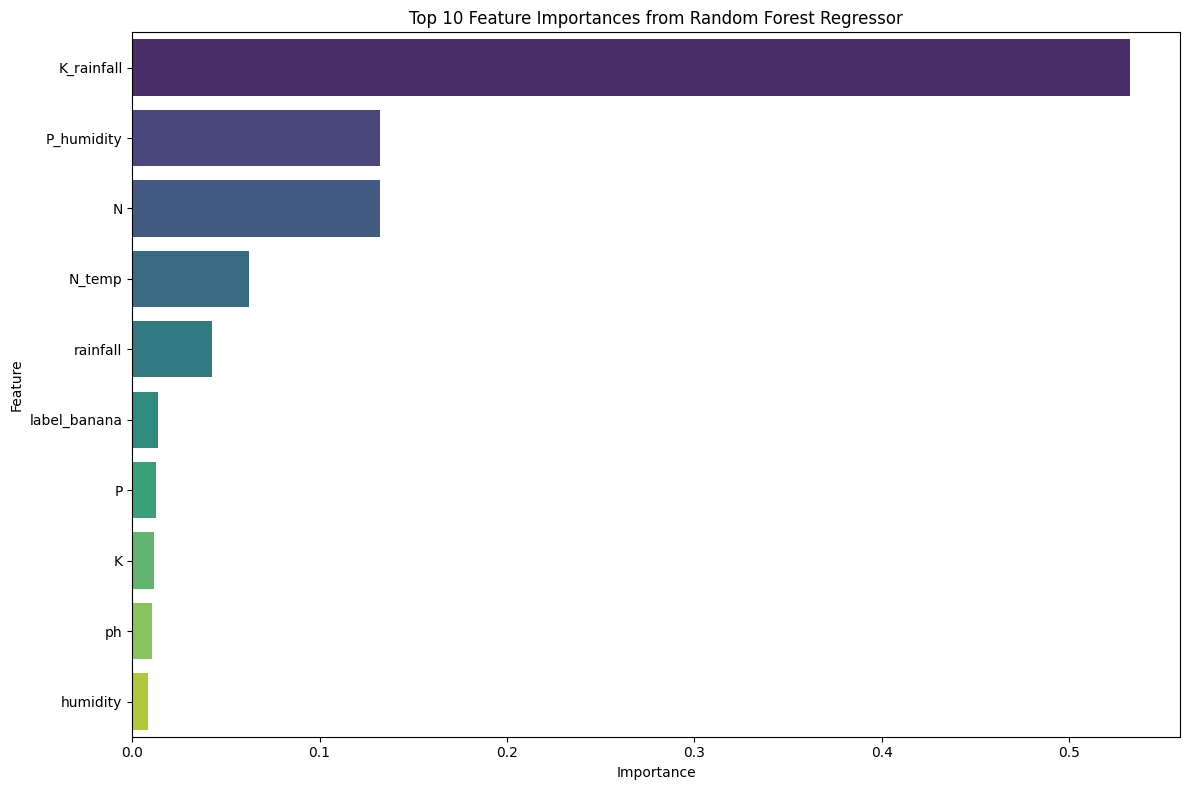

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the best model (Random Forest Regressor)
feature_importances = rf_model.feature_importances_

# Get feature names from X_train
feature_names = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_n = 10
top_features = importance_df.head(top_n)

# Visualize the top N feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {top_n} Feature Importances from Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

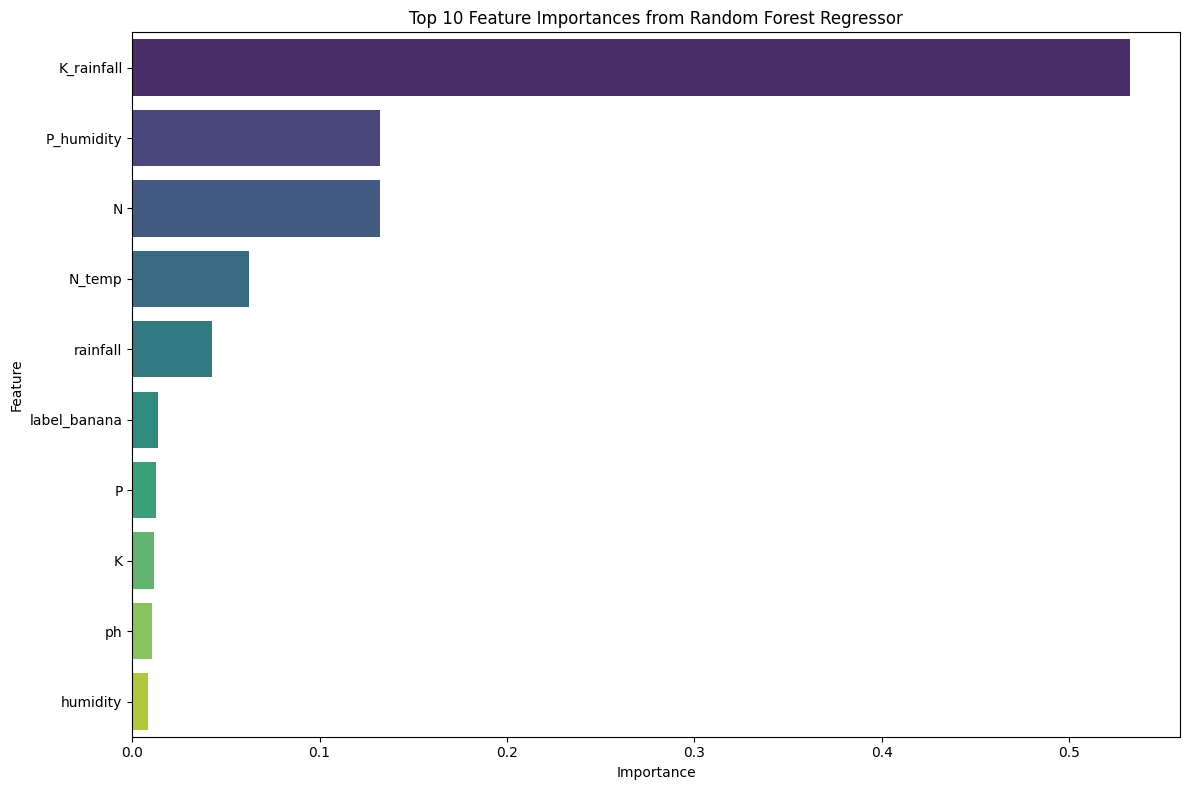

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the best model (Random Forest Regressor)
feature_importances = rf_model.feature_importances_

# Get feature names from X_train
feature_names = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_n = 10
top_features = importance_df.head(top_n);

# Visualize the top N feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=top_features, palette='viridis', legend=False)
plt.title(f'Top {top_n} Feature Importances from Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# import joblib
# import os

# # Define the directory path in Google Drive
# drive_path = '/content/drive/MyDrive/INFOSYS INTERNSHIP'

# # Create the directory if it doesn't exist
# os.makedirs(drive_path, exist_ok=True)

# # Save Random Forest Regressor model
# joblib.dump(rf_model, os.path.join(drive_path, 'random_forest_model.pkl'))
# print(f"Random Forest Regressor model saved to {os.path.join(drive_path, 'random_forest_model.pkl')}")

# # Save XGBoost Regressor model
# joblib.dump(xgb_model, os.path.join(drive_path, 'xgboost_model.pkl'))
# print(f"XGBoost Regressor model saved to {os.path.join(drive_path, 'xgboost_model.pkl')}")

# # Save Linear Regression model
# joblib.dump(lr_model, os.path.join(drive_path, 'linear_regression_model.pkl'))
# print(f"Linear Regression model saved to {os.path.join(drive_path, 'linear_regression_model.pkl')}")

In [ ]:
import pandas as pd

# Get the list of all features the model was trained on
feature_names = X_train.columns

# Initialize a dictionary to store user inputs, with 0s for one-hot encoded features
user_input_data = {col: 0.0 for col in feature_names}

print("Please enter values for the crop yield prediction:")

# --- Get numerical inputs ---
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in numerical_features:
    while True:
        try:
            value = float(input(f"Enter {feature}: "))
            user_input_data[feature] = value
            break
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

# --- Get categorical inputs ---

# For 'label' (crop type)
# Get unique labels from the original df to guide user input
available_labels = df['label'].unique().tolist()
print(f"\nAvailable crop types: {', '.join(available_labels)}")
while True:
    selected_label = input("Enter crop type (e.g., rice, maize): ").strip().lower()
    if selected_label in available_labels:
        # If the selected label is not the one dropped during one-hot encoding ('rice'), set its corresponding column to 1
        if f'label_{selected_label}' in feature_names:
            user_input_data[f'label_{selected_label}'] = 1.0
        # If it's 'rice', all label_xxx columns will remain 0, which is correct for drop_first=True
        break
    else:
        print("Invalid crop type. Please choose from the available list.")

# For 'fertilizer' type
available_fertilizers = df['fertilizer'].unique().tolist()
print(f"\nAvailable fertilizer types: {', '.join(available_fertilizers)}")
while True:
    selected_fertilizer = input("Enter fertilizer type (e.g., DAP, Gypsum): ").strip()
    if selected_fertilizer in available_fertilizers:
        # If the selected fertilizer is not the one dropped ('DAP'), set its corresponding column to 1
        if f'fertilizer_{selected_fertilizer}' in feature_names:
            user_input_data[f'fertilizer_{selected_fertilizer}'] = 1.0
        # If it's 'DAP', all fertilizer_xxx columns will remain 0, which is correct for drop_first=True
        break
    else:
        print("Invalid fertilizer type. Please choose from the available list.")

# --- Calculate interaction features ---
user_input_data['N_temp'] = user_input_data['N'] * user_input_data['temperature']
user_input_data['P_humidity'] = user_input_data['P'] * user_input_data['humidity']
user_input_data['K_rainfall'] = user_input_data['K'] * user_input_data['rainfall']

# Create a DataFrame for prediction, ensuring column order matches X_train
user_df = pd.DataFrame([user_input_data], columns=feature_names)

# Make prediction using the Random Forest model
predicted_yield = rf_model.predict(user_df)

print(f"\nPredicted Crop Yield: {predicted_yield[0]:.2f}")


Please enter values for the crop yield prediction:


KeyboardInterrupt: Interrupted by user

In [ ]:
import numpy as np
import pandas as pd
import joblib
import json
import sklearn
import inspect
import os

# Replace with your actual variable names
MODEL = rf_model  # your trained RandomForest model
X_sample = X.head(1) if 'X' in locals() else None  # your features DataFrame if available

info = {}

# --- Model Details ---
info["model_type"] = type(MODEL).__name__
info["is_classifier"] = "Classifier" in type(MODEL).__name__
info["is_regressor"] = "Regressor" in type(MODEL).__name__
info["sklearn_version"] = sklearn.__version__

# --- Features ---
if X_sample is not None:
    info["feature_names"] = list(X_sample.columns)
    info["feature_dtypes"] = {col: str(X_sample[col].dtype) for col in X_sample.columns}
    info["n_features"] = X_sample.shape[1]
else:
    info["feature_names"] = "Unknown (X not found)"
    info["feature_dtypes"] = {}
    info["n_features"] = "Unknown"

# --- Target Info ---
if 'y' in locals():
    info["target_dtype"] = str(pd.Series(y).dtype)
    info["target_example"] = pd.Series(y).head(3).tolist()
else:
    info["target_dtype"] = "Unknown"
    info["target_example"] = []

# --- Model Parameters ---
info["n_estimators"] = getattr(MODEL, "n_estimators", "N/A")
info["max_depth"] = getattr(MODEL, "max_depth", "N/A")
info["random_state"] = getattr(MODEL, "random_state", "N/A")

# --- Check for Preprocessing Pipeline ---
info["is_pipeline"] = hasattr(MODEL, "steps")
if info["is_pipeline"]:
    info["pipeline_steps"] = [name for name, _ in MODEL.steps]
else:
    info["pipeline_steps"] = []

# --- Save Model ---
save_path = "/content/random_forest_model.pkl"
joblib.dump(MODEL, save_path)
info["saved_model_path"] = save_path

# --- Sample Prediction (if possible) ---
try:
    sample_input = X_sample.values.tolist() if X_sample is not None else [[0]*info["n_features"]]
    pred = MODEL.predict(sample_input).tolist()
    info["sample_prediction"] = pred
except Exception as e:
    info["sample_prediction"] = f"Prediction failed: {e}"

# --- Output Everything ---
print(json.dumps(info, indent=4))

# Optional: Save to JSON for easy import into Django
json_path = "/content/model_metadata.json"
with open(json_path, "w") as f:
    json.dump(info, f, indent=4)

print(f"\n✅ Model metadata saved to: {json_path}")
print(f"✅ Model file saved to: {save_path}")


{
    "model_type": "RandomForestRegressor",
    "is_classifier": false,
    "is_regressor": true,
    "sklearn_version": "1.6.1",
    "feature_names": [
        "N",
        "P",
        "K",
        "temperature",
        "humidity",
        "ph",
        "rainfall",
        "label_banana",
        "label_blackgram",
        "label_chickpea",
        "label_coconut",
        "label_coffee",
        "label_cotton",
        "label_grapes",
        "label_jute",
        "label_kidneybeans",
        "label_lentil",
        "label_maize",
        "label_mango",
        "label_mothbeans",
        "label_mungbean",
        "label_muskmelon",
        "label_orange",
        "label_papaya",
        "label_pigeonpeas",
        "label_pomegranate",
        "label_rice",
        "label_watermelon",
        "fertilizer_Gypsum",
        "fertilizer_Lime",
        "fertilizer_MOP",
        "fertilizer_Potassium Nitrate",
        "fertilizer_Rhizobium",
        "fertilizer_Rock Phosphate",
        "

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Retrain Random Forest with Reduced Complexity



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a new RandomForestRegressor with reduced complexity
rf_model_reduced = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Fit the reduced model to the training data
rf_model_reduced.fit(X_train, y_train)

print("Random Forest Regressor (reduced complexity) training complete.")

Random Forest Regressor (reduced complexity) training complete.


## Evaluate New Model Performance


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Make predictions on the X_test data using the rf_model_reduced model
rf_reduced_predictions = rf_model_reduced.predict(X_test)

# 2. Calculate the Mean Absolute Error (MAE)
rf_reduced_mae = mean_absolute_error(y_test, rf_reduced_predictions)

# 3. Calculate the Mean Squared Error (MSE)
rf_reduced_mse = mean_squared_error(y_test, rf_reduced_predictions)

# 4. Calculate the Root Mean Squared Error (RMSE)
rf_reduced_rmse = np.sqrt(rf_reduced_mse)

# 5. Calculate the R-squared (R²) score
rf_reduced_r2 = r2_score(y_test, rf_reduced_predictions)

# 6. Print the calculated metrics
print("\n--- Random Forest Regressor (Reduced Complexity) Evaluation ---")
print(f"MAE: {rf_reduced_mae:.4f}")
print(f"MSE: {rf_reduced_mse:.4f}")
print(f"RMSE: {rf_reduced_rmse:.4f}")
print(f"R-squared: {rf_reduced_r2:.4f}")

# Optionally, store the evaluation results
model_evaluations['Random Forest (Reduced)'] = {
    'MAE': rf_reduced_mae,
    'RMSE': rf_reduced_rmse,
    'R2': rf_reduced_r2
}


--- Random Forest Regressor (Reduced Complexity) Evaluation ---
MAE: 3.7413
MSE: 21.7667
RMSE: 4.6655
R-squared: 0.9140


## Save and Check Size of New Model


In [ ]:
import joblib
import os

# Define the file path for the retrained model
model_filename = 'random_forest_model_reduced.pkl'

# Save the rf_model_reduced to the specified file path
joblib.dump(rf_model_reduced, model_filename)
print(f"Random Forest Regressor (reduced complexity) model saved to {model_filename}")

# Get the size of the saved model file in bytes
file_size_bytes = os.path.getsize(model_filename)

# Convert the file size to megabytes for readability
file_size_mb = file_size_bytes / (1024 * 1024)

# Print the file size of the saved model
print(f"Size of the saved model file: {file_size_mb:.2f} MB")

Random Forest Regressor (reduced complexity) model saved to random_forest_model_reduced.pkl
Size of the saved model file: 5.36 MB
